## <center>  Projet V0 <br/></center>
<a name="TOP">Nicolas-Yves XIBERAS -Version 1 Partie 1</a>

# Sommaire :
**<u>Intro</u>**
  - <a href="#P0A">Consignes</a>

  
**<u>MENU</u>**  
- Intro : SELECT CITYS</a> 78575 & 89069
- Import & functions
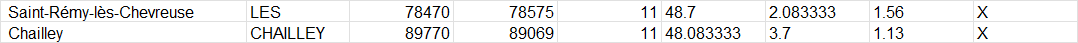
- <a href="#CatalogXLSX">P1 : TARGET</a>
- <a href="#CatalogXLSX">P2 : CREATE CATLOG & EXTRACT 2 EXEMPLE (rec size)</a>

(clefs et analyse)

In [1]:
c1 = str(78575)
c2 = str(89069)

## <a name="intro"></a>Intro : Import & functions&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;<a href="#TOP">&uarr;</a>

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
import os
import zipfile
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
def df_creat(filename, df_dataframe):  
    df = df_dataframe[df_dataframe['filename'] == filename]
    if len(df) == 1:
        row = df.iloc[0]
        file = row['path']
        if os.path.exists(file):
            df_from_csv = pd.read_csv(file, encoding='utf-8', low_memory=False)
            return df_from_csv
        else:
            print('FICHIER NON TROUVE', file)
            return pd.DataFrame()
    else:
        print(f"filename: '{filename}' return size: {len(df)}")
        return pd.DataFrame()

In [5]:
csv_file_path = 'df_filtred.csv'
# Use pandas to read the CSV file into a DataFrame with UTF-8 encoding
df_cat = pd.read_csv(csv_file_path, encoding='utf-8')

In [6]:
df_cat.head(5)

,category,filename,comment,size,depart,district,commune,canton,yyyy,path,codecommune
0,Taille_agglo_commune_csv,codescommunes1999,codes,0,0,0,1,0,1999,../../ProjetCommun/DATA_SOURCES/HCP/Taille_agg...,1
1,Taille_agglo_commune_csv,popcommunes,pop,0,0,0,1,0,0,../../ProjetCommun/DATA_SOURCES/HCP/Taille_agg...,1
2,Taille_agglo_commune_csv,codescommunesnomsmultiples,codesnomsmultiples,0,0,0,1,0,0,../../ProjetCommun/DATA_SOURCES/HCP/Taille_agg...,0
3,Taille_agglo_commune_csv,popcommuneselecteurs,popelecteurs,0,0,0,1,0,0,../../ProjetCommun/DATA_SOURCES/HCP/Taille_agg...,1
4,Taille_agglo_commune_csv,codescommunes2014,codes,0,0,0,1,0,2014,../../ProjetCommun/DATA_SOURCES/HCP/Taille_agg...,1


## <a name="ImportZip"></a>Partie 1 : Target&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;<a href="#TOP">&uarr;</a>

In [7]:
target_filename='leg2022comm'
df_target = df_creat(target_filename , df_cat)
df_target.shape

(34870, 88)

In [8]:
target_codecommune = df_target['codecommune'].unique()
len(target_codecommune)

34870

On a bien l'unicté !!!

## <a name="ImportZip"></a>Partie 2 : CREATION df_exemples &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;<a href="#TOP">&uarr;</a>

In [9]:
df_filtred = df_cat[df_cat['codecommune']==1]
df_filtred.shape

(33, 11)

In [10]:
dataframes = {}
for file_name in df_cat['filename'].tolist() :
    print (file_name)
    df_name = 'df_' + file_name
    try:
        df = df_creat(file_name, df_filtred)
        size_full = df.shape
        df_cat.loc[df_cat['filename'] == file_name, 'col'] = df.shape[1]
        df_cat.loc[df_cat['filename'] == file_name, 'l_full'] = df.shape[0]
        if 'codecommune' in df.columns:
            length_difference = len(set(target_codecommune) - set(df['codecommune'].unique()))
            df_cat.loc[df_cat['filename'] == file_name, 'nb_commun_absent'] = length_difference
            print ('MANQUE ', length_difference)
            df = df[(df['codecommune'] == c1) | (df['codecommune'] == c2)]
            size_2citys = df.shape
            df_cat.loc[df_cat['filename'] == file_name, 'l_2exempl'] = df.shape[0]
        else :
            size_2citys = [0,0]
        dataframes[file_name] = df
    except ValueError:
        print ('ERREUR A LA CREATION')

codescommunes1999
MANQUE  27
popcommunes
MANQUE  30
codescommunesnomsmultiples
filename: 'codescommunesnomsmultiples' return size: 0
popcommuneselecteurs
MANQUE  27
codescommunes2014
MANQUE  27
popdepanciens
filename: 'popdepanciens' return size: 0
popcommunesvbbm
MANQUE  31
codesunitesurbaines2020
MANQUE  51
codescommunescantons1999
MANQUE  27
codescommunesanciensdepartements
MANQUE  33730
codescommunescantons2014
MANQUE  27
publicprivecommunes1894
MANQUE  4772
religiositecommunes
MANQUE  6
religiositecommunes1791
MANQUE  2422
publicprivecommunes2021
MANQUE  7
leg2022comm
MANQUE  0
alphabetisationcommunes
MANQUE  72
diplomescommunes
MANQUE  27
revcommunes
MANQUE  1
pibcommunes
MANQUE  27
capitalimmobilier
MANQUE  1829
terrescommunes
MANQUE  27
basesfiscalescommunes
MANQUE  46
isfcommunes
MANQUE  34496
capitalimmobiliercommunes
MANQUE  228
menagescommunes
MANQUE  242
agesexcommunes
MANQUE  27
rsacommunes
MANQUE  34870
crimesdelitscommunes
MANQUE  30
emploicommunes
MANQUE  52
empfoncomm

In [11]:
df_cat.head(15)

,category,filename,comment,size,depart,district,commune,canton,yyyy,path,codecommune,col,l_full,nb_commun_absent,l_2exempl
0,Taille_agglo_commune_csv,codescommunes1999,codes,0,0,0,1,0,1999,../../ProjetCommun/DATA_SOURCES/HCP/Taille_agg...,1,7.0,39006.0,27.0,2.0
1,Taille_agglo_commune_csv,popcommunes,pop,0,0,0,1,0,0,../../ProjetCommun/DATA_SOURCES/HCP/Taille_agg...,1,983.0,34856.0,30.0,2.0
2,Taille_agglo_commune_csv,codescommunesnomsmultiples,codesnomsmultiples,0,0,0,1,0,0,../../ProjetCommun/DATA_SOURCES/HCP/Taille_agg...,0,0.0,0.0,NaN,NaN
3,Taille_agglo_commune_csv,popcommuneselecteurs,popelecteurs,0,0,0,1,0,0,../../ProjetCommun/DATA_SOURCES/HCP/Taille_agg...,1,179.0,37308.0,27.0,2.0
4,Taille_agglo_commune_csv,codescommunes2014,codes,0,0,0,1,0,2014,../../ProjetCommun/DATA_SOURCES/HCP/Taille_agg...,1,7.0,39006.0,27.0,2.0
5,Taille_agglo_commune_csv,popdepanciens,popdepanciens,0,0,0,0,0,0,../../ProjetCommun/DATA_SOURCES/HCP/Taille_agg...,0,0.0,0.0,NaN,NaN
6,Taille_agglo_commune_csv,popcommunesvbbm,popvbbm,0,0,0,1,0,0,../../ProjetCommun/DATA_SOURCES/HCP/Taille_agg...,1,703.0,34855.0,31.0,2.0
7,Taille_agglo_commune_csv,codesunitesurbaines2020,codesunitesurbaines,0,0,0,0,0,2020,../../ProjetCommun/DATA_SOURCES/HCP/Taille_agg...,1,6.0,34839.0,51.0,2.0
8,Taille_agglo_commune_csv,codescommunescantons1999,codes,0,0,0,1,1,1999,../../ProjetCommun/DATA_SOURCES/HCP/Taille_agg...,1,13.0,39722.0,27.0,2.0
9,Taille_agglo_commune_csv,codescommunesanciensdepartements,codesanciens,0,1,0,1,0,0,../../ProjetCommun/DATA_SOURCES/HCP/Taille_agg...,1,5.0,1150.0,33730.0,1.0


In [12]:
df_cat.to_csv('P1_df_cat.csv', index=False, sep=';')

In [13]:
for file_name, df in dataframes.items():
    print(f"DataFrame for {file_name}:")


DataFrame for codescommunes1999:
DataFrame for popcommunes:
DataFrame for codescommunesnomsmultiples:
DataFrame for popcommuneselecteurs:
DataFrame for codescommunes2014:
DataFrame for popdepanciens:
DataFrame for popcommunesvbbm:
DataFrame for codesunitesurbaines2020:
DataFrame for codescommunescantons1999:
DataFrame for codescommunesanciensdepartements:
DataFrame for codescommunescantons2014:
DataFrame for publicprivecommunes1894:
DataFrame for religiositecommunes:
DataFrame for religiositecommunes1791:
DataFrame for publicprivecommunes2021:
DataFrame for leg2022comm:
DataFrame for alphabetisationcommunes:
DataFrame for diplomescommunes:
DataFrame for revcommunes:
DataFrame for pibcommunes:
DataFrame for capitalimmobilier:
DataFrame for terrescommunes:
DataFrame for basesfiscalescommunes:
DataFrame for isfcommunes:
DataFrame for capitalimmobiliercommunes:
DataFrame for menagescommunes:
DataFrame for agesexcommunes:
DataFrame for rsacommunes:
DataFrame for crimesdelitscommunes:
DataFr

## capitalimmobilier

In [14]:
capitalimmobilier_df = dataframes['capitalimmobilier']

In [15]:
capitalimmobilier_df.head(-50)

,annee,dep,nomdep,codecommune,nomcommune,plm,prixbien,prixm2,surface,surfaceterrain,codemaisonappartement,datemutation,novoie,voie
469481,2014,78,YVELINES,78575,SAINT-REMY-LES-CHEVREUSE,0,81000.0,1173.9131,69,494,1,2014-03-28,10.0,CENTRALE
469482,2014,78,YVELINES,78575,SAINT-REMY-LES-CHEVREUSE,0,95000.0,5937.5000,16,0,2,2014-07-08,24.0,BOSSUET
469483,2014,78,YVELINES,78575,SAINT-REMY-LES-CHEVREUSE,0,100000.0,2941.1765,34,0,2,2014-05-28,15.0,DE LIMOURS
469484,2014,78,YVELINES,78575,SAINT-REMY-LES-CHEVREUSE,0,115000.0,3194.4443,36,0,2,2014-02-28,14.0,VICTOR HUGO
469485,2014,78,YVELINES,78575,SAINT-REMY-LES-CHEVREUSE,0,140000.0,3500.0000,40,0,2,2014-02-05,14.0,VICTOR HUGO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5020934,2020,78,YVELINES,78575,SAINT-REMY-LES-CHEVREUSE,0,610000.0,7625.0000,80,614,1,09/12/2020,37.0,RACINE
5020935,2020,78,YVELINES,78575,SAINT-REMY-LES-CHEVREUSE,0,625000.0,4166.6665,150,660,1,20/05/2020,12.0,DES BOIS
5020936,2020,78,YVELINES,78575,SAINT-REMY-LES-CHEVREUSE,0,628500.0,3571.0227,176,779,1,30/10/2020,17.0,DE VERSAILLES
5020937,2020,78,YVELINES,78575,SAINT-REMY-LES-CHEVREUSE,0,655500.0,3745.7144,175,910,1,25/06/2020,41.0,HOCHE


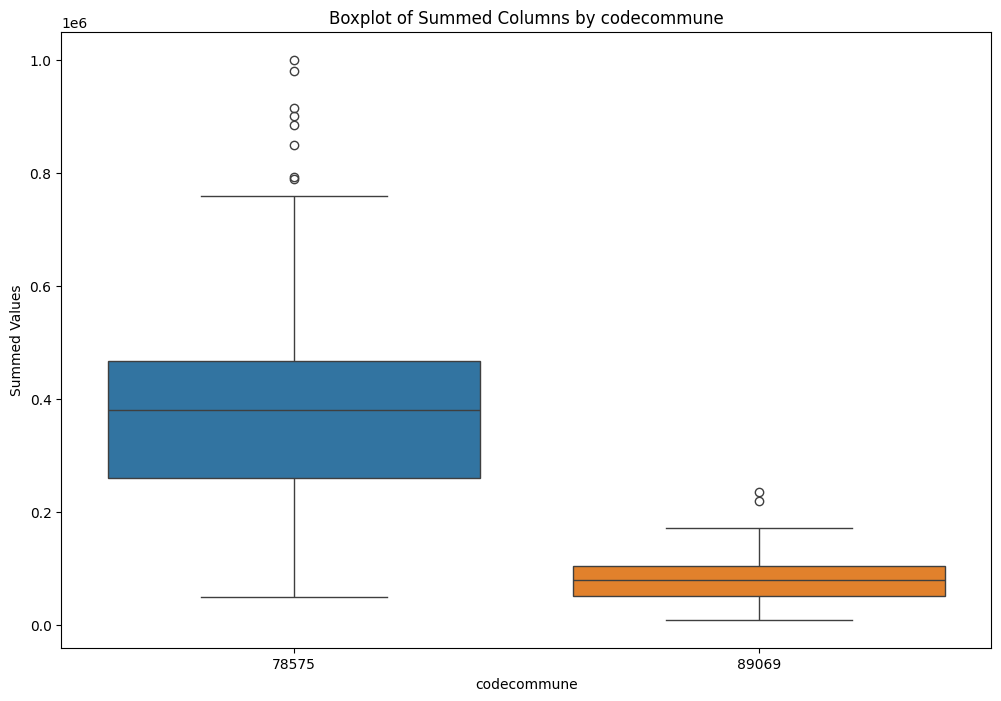

In [16]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='codecommune', y='prixbien', hue='codecommune', data=capitalimmobilier_df)
plt.title('Boxplot of Summed Columns by codecommune')
plt.xlabel('codecommune')
plt.ylabel('Summed Values')
plt.show()

In [17]:
leg2022comm_df = dataframes['leg2022comm']
leg2022comm_df.head()

,dep,nomdep,codecommune,nomcommune,inscrits,votants,exprimes,voixAUG,voixNUP,voixDVG,...,ppar,pparratio,perpar,pblancnul,pblancnulratio,pins,pinsratio,pabs,pblancsnuls,electeurs
30742,78,YVELINES,78575,SAINT-RÉMY-LÈS-CHEVREUSE,5948,3649,3604.0,16,963,0,...,0.613484,1.251078,0.974516,0.007566,0.721799,1.000000,1.075965,0.386516,0.007566,5948.00000
33909,89,YONNE,89069,CHAILLEY,382,157,148.0,1,16,0,...,0.410995,0.838142,0.111154,0.023560,2.247781,0.832537,0.895781,0.589005,0.023560,458.83853


In [18]:
for c in leg2022comm_df :
    print (c , end=' / ')

dep / nomdep / codecommune / nomcommune / inscrits / votants / exprimes / voixAUG / voixNUP / voixDVG / voixECO / voixREG / voixENS / voixUDI / voixLR / voixDVD / voixREC / voixRN / pvoixAUG / pvoixNUP / pvoixDVG / pvoixECO / pvoixREG / pvoixENS / pvoixUDI / pvoixLR / pvoixDVD / pvoixREC / pvoixRN / pvoixAUGratio / pvoixNUPratio / pvoixDVGratio / pvoixECOratio / pvoixREGratio / pvoixENSratio / pvoixUDIratio / pvoixLRratio / pvoixDVDratio / pvoixRECratio / pvoixRNratio / voteG / voteCG / voteC / voteCD / voteD / voteTG / voteTD / voteGCG / voteDCD / pvoteG / pvoteCG / pvoteC / pvoteCD / pvoteD / pvoteTG / pvoteTD / pvoteGCG / pvoteDCD / pvoteGratio / pvoteCGratio / pvoteCratio / pvoteCDratio / pvoteDratio / pvoteGCGratio / pvoteDCDratio / pvoteTGratio / pvoteTDratio / pervoteG / pervoteCG / pervoteC / pervoteCD / pervoteD / pervoteGCG / pervoteDCD / pervoteTG / pervoteTD / plm / plmdoublon / ppar / pparratio / perpar / pblancnul / pblancnulratio / pins / pinsratio / pabs / pblancsnuls /

In [19]:
test = dataframes['religiositecommunes']

In [20]:
test.head(20)

,dep,nomdep,codecommune,nomcommune,perrefra,perpriv,perprivf,perprive,perprives,prefract1791,...,ncantonprim1894,ncantonprim1894_pr,ncantonprim1894f_pr,ncantonprim1894f,privecanton2021_prim,privecanton2021_seco,ncantonprim2021_pr,ncantonprim2021,ncantonseco2021_pr,ncantonseco2021
32336,78,YVELINES,78575,SAINT-REMY-LES-CHEVREUSE,0.298319,0.445578,0.348016,0.321537,0.468219,0.236220,...,1546.0,476.0,281.0,700.0,0.040829,0.139382,195.0,4776.0,424.0,3042.0
35628,89,YONNE,89069,CHAILLEY,0.200359,0.102526,0.112171,0.730129,0.325850,0.142857,...,1267.0,112.0,112.0,634.0,0.195282,0.000000,149.0,763.0,0.0,241.0


## terrescommunes

In [21]:
test2 = dataframes['terrescommunes']
test2.head(20)

,dep,nomdep,codecommune,nomcommune,nomcanton,nexploit,nexploit50p,surface,surface50p,pexploit50p,...,surface50pcanton,pexploit50pcanton,psurface50pcanton,persur50pc,nexploit1968,nexploit50p1968,surface1968,surface50p1968,pexploit50p1968,psurface50p1968
25785,89,YONNE,89069,CHAILLEY,BRIENON-SUR-ARMANCON,23.0,4.0,903.0,400.0,0.173913,...,4600.0,0.144654,0.397717,0.677353,15.0,4.0,649.0,400.0,0.266667,0.616333
34770,78,YVELINES,78575,SAINT-REMY-LES-CHEVREUSE,CHEVREUSE,5.0,4.0,435.0,400.0,0.800000,...,2600.0,0.388060,0.783959,0.838706,5.0,4.0,435.0,400.0,0.800000,0.919540


## capitalimmobiliercommunes

In [22]:
test3 = dataframes['capitalimmobiliercommunes']
test3.head(20)

,dep,nomdep,codecommune,nomcommune,plm,paris,capitalratio1790,capitalratio1791,capitalratio1792,capitalratio1793,...,percap1810,percap1811,percap1812,percap1813,percap1814,percap1815,percap1816,percap1817,percap1818,percap1819
30543,78,YVELINES,78575,SAINT-REMY-LES-CHEVREUSE,0,0,1.780465,1.780465,1.780465,1.780465,...,0.934476,0.934476,0.934476,0.934476,0.934476,0.934476,0.934476,0.934476,0.934476,0.934476
33693,89,YONNE,89069,CHAILLEY,0,0,0.568684,0.568684,0.568684,0.568684,...,0.236301,0.236301,0.236301,0.236301,0.236301,0.236301,0.236301,0.236301,0.236301,0.236301


In [23]:
dico={}
for c in test3 :
    value =test3[c].iloc[0]
    try:
        last4char = int(c[-4:])
        if last4char > 0 and (last4char == 2022 or last4char == 2012) :
            dico[c] = value
            print (c)
    except ValueError as e:
        dico[c] = value
print (dico)

capitalratio2012
capitalratio2022
capitalratioagglo2012
capitalratioagglo2022
capitalimmo2012
capitalimmo2022
capitalimmoagglo2012
capitalimmoagglo2022
prixbien2012
prixbien2022
surfaceterrain2022
pop2012
pop2022
percapagglo2012
percapagglo2022
surface2022
propappartementdep2022
propappartement2022
prixm22022
prixm2ratio2022
percap2012
percap2022
{'dep': '78', 'nomdep': 'YVELINES', 'codecommune': '78575', 'nomcommune': 'SAINT-REMY-LES-CHEVREUSE', 'plm': 0, 'paris': 0, 'capitalratio2012': 1.9531806, 'capitalratio2022': 1.8847766, 'capitalratioagglo2012': 1.7105609, 'capitalratioagglo2022': 1.7292693, 'capitalimmo2012': 0.00023827924, 'capitalimmo2022': 0.00022602519, 'capitalimmoagglo2012': 0.2848047571392271, 'capitalimmoagglo2022': 0.2888471671175239, 'prixbien2012': 373581.56, 'prixbien2022': 418497.16, 'surfaceterrain2022': 366.40103, 'pop2012': 7730, 'pop2022': 7883, 'codeagglo': 'A00851', 'percapagglo2012': 0.99398649, 'percapagglo2022': 0.99348682, 'nomagglo': 'PARIS', 'surface20

Le dictionnaire fourni semble contenir des informations sur une entité géographique, probablement une commune ou une zone spécifique. Voici une interprétation générale des clés et valeurs du dictionnaire :

    'dep': Code du département (78 pour Yvelines).
    'nomdep': Nom du département (YVELINES).
    'codecommune': Code de la commune (78575 pour Saint-Remy-les-Chevreuse).
    'nomcommune': Nom de la commune (SAINT-REMY-LES-CHEVREUSE).
    'plm', 'paris': Ces clés semblent être des indicateurs, probablement liés à la proximité de Paris.
    'capitalratio2022', 'capitalratioagglo2022': Ratio du capital pour l'année 2022 et le ratio agrégé dans l'agglomération.
    'capitalimmo2022', 'capitalimmoagglo2022': Valeurs liées au capital immobilier pour 2022 et le capital immobilier agrégé dans l'agglomération.
    'prixbien2022': Prix des biens immobiliers pour l'année 2022.
    'surfaceterrain2022': Surface du terrain pour 2022.
    'pop2022': Population pour l'année 2022.
    'codeagglo': Code de l'agglomération (A00851 pour Paris).
    'percapagglo2022': Revenu par habitant dans l'agglomération pour 2022.
    'nomagglo': Nom de l'agglomération (PARIS).
    'surface2022': Surface totale pour 2022.
    'propappartementdep2022', 'propappartement2022': Proportion d'appartements dans le département et la commune pour 2022.
    'prixm22022': Prix moyen au mètre carré pour 2022.
    'prixm2ratio2022': Ratio du prix au mètre carré pour 2022.
    'percap2022': Revenu par habitant pour 2022.
    
prixbien2022     
surfaceterrain2022
propappartement2022
prixm22022
percap2022

## proprietairescommunes

In [24]:
test4 = dataframes['proprietairescommunes']
test4.head(20)

,dep,nomdep,codecommune,nomcommune,ppropri1960,ppropri1961,ppropri1962,ppropri1963,ppropri1964,ppropri1965,...,perpropri1950,perpropri1951,perpropri1952,perpropri1953,perpropri1954,perpropri1955,perpropri1956,perpropri1957,perpropri1958,perpropri1959
33439,78,YVELINES,78575,SAINT-REMY-LES-CHEVREUSE,0.553719,0.575000,0.594743,0.613108,0.630235,0.646594,...,0.814717,0.814717,0.814717,0.814717,0.814717,0.814717,0.814717,0.814717,0.814717,0.814717
36906,89,YONNE,89069,CHAILLEY,0.685446,0.691943,0.693780,0.695652,0.702439,0.704434,...,0.935826,0.935826,0.935826,0.935826,0.935826,0.935826,0.935826,0.935826,0.935826,0.935826


In [25]:
list_select_yyyy =[2022,2012,2002,1992]

## etrangerscommunes

In [26]:
test5 = dataframes['etrangerscommunes']
test5.head(20)

,codecommune,dep,etranger1851,etranger1852,etranger1853,etranger1854,etranger1855,etranger1856,etranger1857,etranger1858,...,petranger2013,petranger2014,petranger2015,petranger2016,petranger2017,petranger2018,petranger2019,petranger2020,petranger2021,petranger2022
26673,89069,89,2,2,2,2,2,2,2,2,...,0.037838,0.038113,0.038321,0.038603,0.038889,0.039033,0.039033,0.039179,0.039326,0.039474
31401,78575,78,5,6,6,7,7,7,8,8,...,0.047505,0.051752,0.056077,0.060262,0.064428,0.066228,0.068238,0.070145,0.072153,0.074051


## naticommunes

In [27]:
test6 = dataframes['naticommunes']
test6.head(20)

,dep,nomdep,codecommune,nomcommune,paris,lm,pop1962,francais1962,etranger1962,franaiss1962,...,pnatur2007,pnaturfra2007,pnatur2012,pnaturfra2012,pnatur2017,pnaturfra2017,pnatur2022,pnaturfra2022,perimm,petranalg1962
23992,89,YONNE,89069,CHAILLEY,0,0,570.0,560.0,10.0,544.0,...,0.044674,0.045855,0.019678,0.020446,0.018519,0.019268,0.015209,0.015842,0.341669,0.000000
31581,78,YVELINES,78575,SAINT-REMY-LES-CHEVREUSE,0,0,3080.0,2909.0,171.0,2840.0,...,0.047595,0.049821,0.058215,0.060860,0.043500,0.046499,0.045752,0.049679,0.579849,0.001299


In [28]:
dico={}
list_select_2022 =[2022]
for c in test6 :
    value =test6[c].iloc[0]
    try:
        last4char = int(c[-4:])
        if last4char > 0 and last4char in list_select_2022 :
            dico[c] = value
    except ValueError as e:
        dico[c] = value
print (dico)

{'dep': '89', 'nomdep': 'YONNE', 'codecommune': '89069', 'nomcommune': 'CHAILLEY', 'paris': 0, 'lm': 0, 'petranger2022': 0.039923955, 'peretr2022': 0.43340564, 'francais2022': 505, 'etranger2022': 21, 'pop2022': 526, 'immigre2022': 26, 'prapat': 0.0019455253, 'perrapat': 0.21687323, 'pimmigre2022': 0.049429659, 'immnatur2022': 5, 'pimmnatur2022': 0.0095057031, 'perimmigre2022': 0.34166935, 'natur2022': 8, 'pnatur2022': 0.015209125, 'pnaturfra2022': 0.015841585, 'perimm': 0.34166935}


- 'dep': '89': Cela représente le code du département, dans ce cas, le département 89, qui est YONNE.
- 'nomdep': 'YONNE': Le nom du département associé au code 89.
- 'codecommune': '89069': Il s'agit du code de la commune, et dans ce cas, il correspond à CHAILLEY.
-'nomcommune': 'CHAILLEY': Le nom de la commune associé au code commune 89069.
- 'paris': 0: Le nombre de Parisiens dans la commune (c'est-à-dire, personnes nées à Paris) est de 0.
- 'lm': 0: Le nombre de personnes ayant déménagé de l'étranger est de 0.
- 'petranger2022': 0.039923955: Un pourcentage de personnes d'origine étrangère en 2022, avec une valeur de 0.039923955.
- 'peretr2022': 0.43340564: Un pourcentage de personnes d'origine étrangère en 2022 par rapport à la population totale, avec une valeur de 0.43340564.
- 'francais2022': 505: Le nombre de personnes de nationalité française en 2022 est de 505.
- 'etranger2022': 21: Le nombre de personnes d'origine étrangère en 2022 est de 21.
- pop2022': 526: La population totale en 2022 est de 526.
- 'immigre2022': 26: Le nombre total d'immigrés en 2022 est de 26.
- 'prapat': 0.0019455253: Un pourcentage de personnes d'origine étrangère en 2022 par rapport à la population totale, avec une valeur de 0.0019455253.
- 'perrapat': 0.21687323: Un pourcentage de personnes d'origine étrangère parmi les immigrants en 2022, avec une valeur de 0.21687323.
- 'pimmigre2022': 0.049429659: Un pourcentage d'immigrants par rapport à la population totale en 2022, avec une valeur de 0.049429659.
- 'immnatur2022': 5: Le nombre d'immigrants naturalisés en 2022 est de 5.
- 'pimmnatur2022': 0.0095057031: Un pourcentage d'immigrants naturalisés par rapport à la population totale en 2022, avec une valeur de 0.0095057031.
- 'perimmigre2022': 0.34166935: Un pourcentage d'immigrants par rapport à la population totale en 2022, avec une valeur de 0.34166935.
- 'natur2022': 8: Le nombre total de personnes naturalisées en 2022 est de 8.
- 'pnatur2022': 0.015209125: Un pourcentage de personnes naturalisées par rapport à la population totale en 2022, avec une valeur de 0.015209125.
- 'pnaturfra2022': 0.015841585: Un pourcentage de personnes naturalisées d'origine française par rapport à la population totale en 2022, avec une valeur de 0.015841585.
- 'perimm': 0.34166935: Un pourcentage d'immigrants par rapport à la population totale, avec une valeur de 0.34166935.

## agesexcommunes

In [29]:
test8 = dataframes['agesexcommunes']
test8.head(20)

,dep,nomdep,codecommune,nomcommune,poph0141962,poph15391962,poph40591962,poph60p1962,popf0141962,popf15391962,...,perprop0141957,perprop60p1957,perpropf1958,perage1958,perprop0141958,perprop60p1958,perpropf1959,perage1959,perprop0141959,perprop60p1959
6492,89,YONNE,89069,CHAILLEY,72.0,74.0,64.0,76.0,65.0,56.0,...,0.637797,0.940726,0.283786,0.765515,0.637797,0.940726,0.283786,0.765515,0.637797,0.940726
18039,78,YVELINES,78575,SAINT-RÉMY-LÈS-CHEVREUSE,393.0,523.0,358.0,235.0,348.0,511.0,...,0.393892,0.637003,0.388464,0.635928,0.393892,0.637003,0.388464,0.635928,0.393892,0.637003


In [30]:
test8.shape

(2, 2385)

In [31]:
dico={}
list_select_2022 =[2022]
for c in test8 :
    value =test8[c].iloc[0]
    try:
        last4char = int(c[-4:])
        if last4char > 0 and last4char in list_select_2022 :
            dico[c] = value
            print (c[:-4])
    except ValueError as e:
        dico[c] = value
print (dico)

popf014
popf1539
popf4059
popf60p
poph014
poph1539
poph4059
poph60p
agef
ageh
popf
poph
propf
age
pop
propf014
propf1539
propf4059
propf60p
prop014
prop1539
prop4059
prop60p
perpropf
perage
perprop014
perprop60p
{'dep': '89', 'nomdep': 'YONNE', 'codecommune': '89069', 'nomcommune': 'CHAILLEY', 'popf0142022': 0, 'popf15392022': 87, 'popf40592022': 124, 'popf60p2022': 77, 'poph0142022': 36, 'poph15392022': 80, 'poph40592022': 106, 'poph60p2022': 21, 'agef2022': 53.164707, 'ageh2022': 36.783825, 'popf2022': 288, 'poph2022': 243, 'propf2022': 0.54237288, 'age2022': 45.668373, 'pop2022': 531, 'propf0142022': 0.0, 'propf15392022': 0.52095807, 'propf40592022': 0.53913045, 'propf60p2022': 0.78571427, 'prop0142022': 0.06779661, 'prop15392022': 0.31450093, 'prop40592022': 0.43314502, 'prop60p2022': 0.18455744, 'perpropf2022': 0.84531301, 'perage2022': 0.81005365, 'perprop0142022': 0.018326038, 'perprop60p2022': 0.12573816}


## diplomescommunes


In [32]:
test9 = dataframes['diplomescommunes']
test9.head(20)

,dep,nomdep,codecommune,nomcommune,nodiph1962,bach1962,suph1962,nodipf1962,bacf1962,supf1962,...,perbac1955,persup1955,perbac1956,persup1956,perbac1957,persup1957,perbac1958,persup1958,perbac1959,persup1959
33487,78,YVELINES,78575,SAINT-REMY-LES-CHEVREUSE,783.0,42.0,80.0,946.0,32.0,21.0,...,0.916089,0.946423,0.916089,0.946423,0.916089,0.946423,0.916089,0.946423,0.916089,0.946423
36954,89,YONNE,89069,CHAILLEY,169.0,2.0,0.0,163.0,2.0,0.0,...,0.144763,0.039020,0.144763,0.039020,0.144763,0.039020,0.144763,0.039020,0.144763,0.039020


## basesfiscalescommunes

In [36]:
test10 = dataframes['basesfiscalescommunes']
test10.head(20)

,dep,nomdep,codecommune,nomcommune,cog1881,cog1911,cog1920,codecommune1881,codecommune1911,codecommune1920,...,pop2021,pop2022,recetteratio2019,recetteratio2020,recetteratio2021,recetteratio2022,recetteimpotslocauxratio2021,recetteimpotslocauxratio2022,recetteimpotslocauxratio1980,recetteimpotslocauxratio1981
35439,78,YVELINES,78575,SAINT-RÉMY-LÈS-CHEVREUSE,1.0,NaN,NaN,78575,78575,78575,...,7857.0,7883.0,1.144899,1.144899,1.144899,1.144899,1.512144,1.512144,1.220876,1.220876
39207,89,YONNE,89069,CHAILLEY,1.0,1.0,1.0,89069,89069,89069,...,523.0,520.0,1.280920,1.280920,1.280920,1.280920,0.950058,0.950058,0.842258,0.842258


In [37]:
test10.shape

(2, 1112)

## cspcommunes

In [38]:
test11 = dataframes['cspcommunes']
test11.head(20)

,dep,nomdep,codecommune,nomcommune,agri1962,indp1962,cadr1962,pint1962,empl1962,ouvr1962,...,perchom1950,perchom1951,perchom1952,perchom1953,perchom1954,perchom1955,perchom1956,perchom1957,perchom1958,perchom1959
33487,78,YVELINES,78575,SAINT-REMY-LES-CHEVREUSE,8.0,103.0,59.0,111.0,215.0,344.0,...,0.839798,0.839798,0.839798,0.839798,0.839798,0.839798,0.839798,0.839798,0.839798,0.839798
36954,89,YONNE,89069,CHAILLEY,28.0,24.0,0.0,4.0,16.0,43.0,...,0.996434,0.996434,0.996434,0.996434,0.996434,0.996434,0.996434,0.996434,0.996434,0.996434


## TRAGET : leg2022comm

In [33]:
test7 = dataframes['leg2022comm']
test7.head(20)

,dep,nomdep,codecommune,nomcommune,inscrits,votants,exprimes,voixAUG,voixNUP,voixDVG,...,ppar,pparratio,perpar,pblancnul,pblancnulratio,pins,pinsratio,pabs,pblancsnuls,electeurs
30742,78,YVELINES,78575,SAINT-RÉMY-LÈS-CHEVREUSE,5948,3649,3604.0,16,963,0,...,0.613484,1.251078,0.974516,0.007566,0.721799,1.000000,1.075965,0.386516,0.007566,5948.00000
33909,89,YONNE,89069,CHAILLEY,382,157,148.0,1,16,0,...,0.410995,0.838142,0.111154,0.023560,2.247781,0.832537,0.895781,0.589005,0.023560,458.83853


In [34]:
for c in test7 : 
    print (c, end ='  |  ')

dep  |  nomdep  |  codecommune  |  nomcommune  |  inscrits  |  votants  |  exprimes  |  voixAUG  |  voixNUP  |  voixDVG  |  voixECO  |  voixREG  |  voixENS  |  voixUDI  |  voixLR  |  voixDVD  |  voixREC  |  voixRN  |  pvoixAUG  |  pvoixNUP  |  pvoixDVG  |  pvoixECO  |  pvoixREG  |  pvoixENS  |  pvoixUDI  |  pvoixLR  |  pvoixDVD  |  pvoixREC  |  pvoixRN  |  pvoixAUGratio  |  pvoixNUPratio  |  pvoixDVGratio  |  pvoixECOratio  |  pvoixREGratio  |  pvoixENSratio  |  pvoixUDIratio  |  pvoixLRratio  |  pvoixDVDratio  |  pvoixRECratio  |  pvoixRNratio  |  voteG  |  voteCG  |  voteC  |  voteCD  |  voteD  |  voteTG  |  voteTD  |  voteGCG  |  voteDCD  |  pvoteG  |  pvoteCG  |  pvoteC  |  pvoteCD  |  pvoteD  |  pvoteTG  |  pvoteTD  |  pvoteGCG  |  pvoteDCD  |  pvoteGratio  |  pvoteCGratio  |  pvoteCratio  |  pvoteCDratio  |  pvoteDratio  |  pvoteGCGratio  |  pvoteDCDratio  |  pvoteTGratio  |  pvoteTDratio  |  pervoteG  |  pervoteCG  |  pervoteC  |  pervoteCD  |  pervoteD  |  pervoteGCG  |  pervot

Cette table semble contenir des résultats électoraux pour les élections législatives de 2022 en France. Voici une interprétation des intitulés de chaque colonne :

    Informations générales sur la circonscription :
        dep: Code du département.
        nomdep: Nom du département.
        codecommune: Code de la commune.
        nomcommune: Nom de la commune.

    Statistiques de participation :
        inscrits: Nombre d'électeurs inscrits.
        votants: Nombre d'électeurs ayant voté.
        exprimes: Nombre de votes exprimés.

    Résultats par candidat :
        voixAUG, voixNUP, voixDVG, voixECO, voixREG, voixENS, voixUDI, voixLR, voixDVD, voixREC, voixRN: Nombre de voix pour chaque candidat ou liste.

    Pourcentages de voix par candidat :
        pvoixAUGratio, pvoixNUPratio, pvoixDVGratio, pvoixECOratio, pvoixREGratio, pvoixENSratio, pvoixUDIratio, pvoixLRratio, pvoixDVDratio, pvoixRECratio, pvoixRNratio: Pourcentage de voix pour chaque candidat par rapport aux votes exprimés.

    Résultats par groupe politique :
        voteG, voteCG, voteC, voteCD, voteD, voteTG, voteTD, voteGCG, voteDCD: Nombre de voix pour chaque groupe politique ou coalition.

    Pourcentages de voix par groupe politique :
        pvoteG, pvoteCG, pvoteC, pvoteCD, pvoteD, pvoteTG, pvoteTD, pvoteGCG, pvoteDCD: Pourcentage de voix pour chaque groupe politique par rapport aux votes exprimés.

    Ratios de pourcentages de voix par groupe politique :
        pvoteGratio, pvoteCGratio, pvoteCratio, pvoteCDratio, pvoteDratio, pvoteGCGratio, pvoteDCDratio, pvoteTGratio, pvoteTDratio: Ratios entre les pourcentages de voix de différents groupes politiques.

    Participation et abstention :
        pervoteG, pervoteCG, pervoteC, pervoteCD, pervoteD, pervoteGCG, pervoteDCD, pervoteTG, pervoteTD: Pourcentage de voix par rapport au nombre d'électeurs inscrits.

    Autres indicateurs :
        plm: Plafond des mentions légales.
        plmdoublon: Plafond des mentions légales en cas de doublon.
        ppar: Plafond des participations.
        pparratio: Ratio du plafond des participations.
        perpar: Plafond des participations en pourcentage.
        pblancnul: Plafond des votes blancs et nuls.
        pblancnulratio: Ratio du plafond des votes blancs et nuls.
        pins: Plafond des inscrits.
        pinsratio: Ratio du plafond des inscrits.
        pabs: Plafond des abstentions.
        pblancsnuls: Plafond des votes blancs et nuls.

- 1 AUG : Gauche de la Gauche (divers)
- 2 NUP : NUPES
- 3 DVG : Divers Gauche
- 4 ECO : Ecologistes
- 5 REG : Regionalistes
- 6 ENS : Endsemble (MACRON)
- 7 UDI : Union des Demacrates Independantes
- 8 LR : Les républicains
- 9 DVD : Divers Droite
- 10 REC : Reconquete
- 11 RN : Rassemblement National

In [35]:
info = test7.iloc[0]
for c in test7 : 
    print (c,info[c])

dep 78
nomdep YVELINES
codecommune 78575
nomcommune SAINT-RÉMY-LÈS-CHEVREUSE
inscrits 5948
votants 3649
exprimes 3604.0
voixAUG 16
voixNUP 963
voixDVG 0
voixECO 256
voixREG 24
voixENS 1380
voixUDI 108
voixLR 328
voixDVD 68
voixREC 192
voixRN 269
pvoixAUG 0.0044395118
pvoixNUP 0.26720312
pvoixDVG 0.0
pvoixECO 0.071032189
pvoixREG 0.0066592675
pvoixENS 0.38290787
pvoixUDI 0.029966705
pvoixLR 0.091009989
pvoixDVD 0.018867925
pvoixREC 0.05327414
pvoixRN 0.074639291
pvoixAUGratio 0.37879854
pvoixNUPratio 1.0166905
pvoixDVGratio 0.0
pvoixECOratio 2.6504917
pvoixREGratio 0.39990118
pvoixENSratio 1.4779506
pvoixUDIratio 1.633914
pvoixLRratio 0.85992903
pvoixDVDratio 0.57701421
pvoixRECratio 1.2334927
pvoixRNratio 0.38795835
voteG 983.79999
voteCG 260.79999
voteC 1492.8
voteCD 400.79999
voteD 465.79999
voteTG 1991.0
voteTD 1613.0
voteGCG 1244.6
voteDCD 866.59998
pvoteG 0.27297446
pvoteCG 0.07236404
pvoteC 0.41420645
pvoteCD 0.11120977
pvoteD 0.12924528
pvoteTG 0.55244172
pvoteTD 0.44755825
pvot